# 机器学习问题实例——使用K-近邻解决分类问题

In [37]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn
from IPython.display import Image
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sebastian Raschka

Last updated: 2023-10-22

numpy     : 1.26.0
pandas    : 2.1.1
matplotlib: 3.8.0
sklearn   : 1.3.1



In [38]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

digits = datasets.load_digits()
X = digits.data[:200, :]
y = digits.target[:200]

### 得到数据集

将数据集划为70%作为训练集，30%划分为测试集。其中test_size控制的划分比例，random_state=1，则保证每次随机结果一致；stratify保证训练集和测试集中不同类别的数据占比一致

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### 标准化并简单的可视化

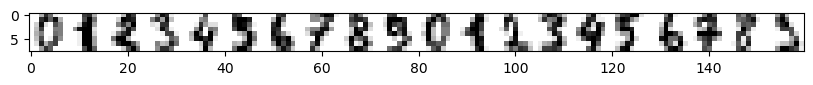

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_sample = np.hstack([X[i].reshape(8, 8) for i in range(20)])
plt.figure(figsize=(10,80))
plt.imshow(X_sample, cmap=plt.cm.gray_r)
plt.show()

### 设置模型，策略，算法

模型和算法为knn模型

模型参数的具体方案很多，排列组合测试其效果（n_neighbors表示邻居数，p_list表示范数的参数，metric表示距离的度量方法）

策略：损失函数为$\frac{1}{N}\Sigma_{i=1}^N [Y_i\neq f(X_i)]$

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 定义不同参数的列表
n_neighbors_list = [3, 5, 7]
p_list = [1, 2]
metric_list = ['euclidean', 'manhattan']

best_accuracy = 0.0
best_params = None

# 循环测试不同参数组合
for n_neighbors in n_neighbors_list:
    for p in p_list:
        for metric in metric_list:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, metric=metric)
            
            # 模型训练
            knn.fit(X_train_std, y_train)
            
            # 预测测试集
            y_test_pre = knn.predict(X_test_std)
            
            # 计算准确率
            test_accuracy = accuracy_score(y_test_pre, y_test)
            
            # 输出结果
            print("Parameters: n_neighbors={}, p={}, metric={}".format(n_neighbors, p, metric))
            print("Testing accuracy: %.3f" % test_accuracy)
            print("--------------------------------------")
            
            # 更新最佳参数组合
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = (n_neighbors, p, metric)

# 输出最佳参数组合
print("Best parameters: n_neighbors={}, p={}, metric={}".format(best_params[0], best_params[1], best_params[2]))
print("Best testing accuracy: %.3f" % best_accuracy)

Parameters: n_neighbors=3, p=1, metric=euclidean
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=3, p=1, metric=manhattan
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=3, p=2, metric=euclidean
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=3, p=2, metric=manhattan
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=5, p=1, metric=euclidean
Testing accuracy: 0.933
--------------------------------------
Parameters: n_neighbors=5, p=1, metric=manhattan
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=5, p=2, metric=euclidean
Testing accuracy: 0.933
--------------------------------------
Parameters: n_neighbors=5, p=2, metric=manhattan
Testing accuracy: 0.967
--------------------------------------
Parameters: n_neighbors=7, p=1, metric=euclidean
Testing accuracy: 0.933
-------------------------------

### 利用模型对新数据进行分类

the predicted label of this sample is:4
the real label of this sample is:4


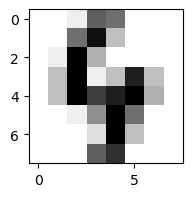

In [43]:
knn = KNeighborsClassifier(n_neighbors=3, p=1, metric='euclidean')
knn.fit(X_train_std, y_train)
import random
index = random.randint(0,60)
digit_sample = np.expand_dims(X_test[index],0)
plt.figure(figsize=(2,2))
plt.imshow(digit_sample.reshape(8, 8), cmap=plt.cm.gray_r)
digit_label = knn.predict(digit_sample)
print("the predicted label of this sample is:%d"%digit_label[0])
print("the real label of this sample is:%d"%y_test[index])